In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import timedelta

In [43]:
df_reviews = pd.read_csv('C:/Users/Immig/Documents/DSBA-6211/Project_Airbnb/data/2022-09-15/reviews.csv')

In [ ]:
df_reviews.head()

In [5]:
df_reviews['date'] = pd.to_datetime(df_reviews['date'])
df_reviews.dtypes

listing_id                int64
id                        int64
date             datetime64[ns]
reviewer_id               int64
reviewer_name            object
comments                 object
dtype: object

In [6]:
df_reviews_agg = df_reviews.groupby('listing_id', as_index=False).agg({'date': ['min', 'max', 'count'], 'reviewer_id': 'nunique'})
df_reviews_agg.columns = df_reviews_agg.columns.droplevel(0)
df_reviews_agg = df_reviews_agg.rename({'':'listing_id'}, axis='columns')

In [7]:
# Approximate time the listing has been active based on the first and last review
df_reviews_agg['active_days'] = (df_reviews_agg['max'] - df_reviews_agg['min']).dt.days

In [8]:
# keep only listing_ids where the number of active days is more than 90 according to the reviews
dropindex = df_reviews_agg[df_reviews_agg['active_days']<90].index
df_reviews_agg.drop(dropindex, inplace=True)

In [9]:
print(len(df_reviews_agg))
print(df_reviews['listing_id'].nunique())

5703
6824


In [10]:
# calculate avg number of reviews per day
df_reviews_agg['avg_reviews'] = df_reviews_agg['count']/df_reviews_agg['active_days'] 

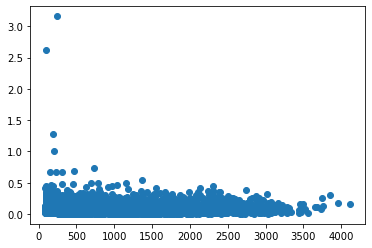

In [11]:
df_reviews_agg.sort_values(by='active_days')
plt.scatter(df_reviews_agg['active_days'], df_reviews_agg['avg_reviews'])
plt.show()

In [12]:
# let's look at the listings with high values for avg_reviews
df_reviews_agg[df_reviews_agg['avg_reviews']>0.6]

,listing_id,min,max,count,nunique,active_days,avg_reviews
3368,44118481,2020-09-08,2022-09-13,536,532,735,0.729252
4168,49516167,2021-05-16,2022-09-01,327,325,473,0.691332
4889,52735247,2022-02-13,2022-08-30,201,198,198,1.015152
4912,52796641,2021-10-24,2022-09-01,208,206,312,0.666667
5377,54227245,2022-01-14,2022-09-14,768,755,243,3.160494
5379,54239596,2022-01-30,2022-09-12,152,152,225,0.675556
5474,548323419852960463,2022-02-26,2022-08-31,239,237,186,1.284946
5927,587158401761219683,2022-03-29,2022-09-01,105,101,156,0.673077
6130,608614132921447513,2022-06-04,2022-09-05,244,243,93,2.623656


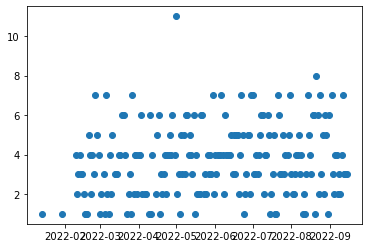

In [13]:
temp = df_reviews[df_reviews['listing_id']== 54227245]

temp_gpby = temp.groupby(by='date').count()
#temp_gpby
plt.scatter(temp_gpby.index, temp_gpby['listing_id'])
plt.show()

In [14]:
# drop listings with > 1.0 avg_reviews
dropindex = df_reviews_agg[df_reviews_agg['avg_reviews']>1].index
df_reviews_agg.drop(dropindex, inplace = True)

<AxesSubplot:>

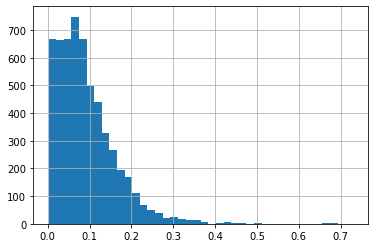

In [15]:
df_reviews_agg['avg_reviews'].hist(bins=40)

In [16]:
df_reviews_agg

,listing_id,min,max,count,nunique,active_days,avg_reviews
0,6422,2009-04-30,2020-03-03,674,651,3960,0.170202
1,39870,2016-09-16,2022-09-11,328,291,2186,0.150046
3,72906,2011-06-09,2022-09-11,658,653,4112,0.160019
4,258817,2011-12-12,2019-12-14,96,96,2924,0.032832
5,289242,2011-12-28,2019-01-12,76,76,2572,0.029549
...,...,...,...,...,...,...,...
6396,640786779988883222,2022-06-12,2022-09-12,12,12,92,0.130435
6400,641323368096916217,2022-06-13,2022-09-12,9,9,91,0.098901
6406,642638292989650849,2022-06-07,2022-09-13,21,21,98,0.214286
6408,642941622823561145,2022-06-12,2022-09-11,10,10,91,0.109890


# Retrieve data from listings.csv

In [17]:
df_listings_latest = pd.read_csv('C:/Users/Immig/Documents/DSBA-6211/Project_Airbnb/data/2022-09-15/listings.csv', index_col='id')

In [18]:
df_listings_latest.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar

In [38]:
df_reviews_agg.columns

Index(['listing_id', 'min', 'max', 'count', 'nunique', 'active_days',
       'avg_reviews'],
      dtype='object')

In [33]:
df_combined = df_reviews_agg.join(df_listings_latest, on='listing_id', how='inner')

In [39]:
df_combined['active_days2'] = (pd.to_datetime(df_combined['last_review']) - pd.to_datetime(df_combined['first_review'])).dt.days

In [40]:
df_combined['avg_reviews2'] = df_combined['number_of_reviews']/df_combined['active_days2']
df_combined['review_residual'] = df_combined['avg_reviews2']-df_combined['avg_reviews']

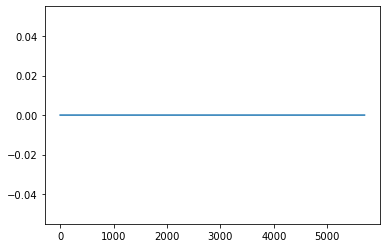

In [41]:

df_combined = df_combined.sort_values(by='avg_reviews', ascending=True)

plt.figure(0)
plt.plot(np.arange(len(df_combined)), df_combined['review_residual'])
plt.show()